In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.drop(["PassengerId","Name","Ticket","Fare","Cabin"],axis=1,inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [7]:
df["Age"].fillna(df.mean()['Age'],inplace=True)

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [10]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df["Sex"])
le.classes_
df["Sex"]=le.transform(df["Sex"])

In [11]:
df["Embarked"].fillna('T',inplace=True)

In [12]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df["Embarked"])
le.classes_
df["Embarked"]=le.transform(df["Embarked"])

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [14]:
x=df[["Pclass","Sex","Age","SibSp","Parch","Embarked"]]
y=df[["Survived"]]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)  
clf.fit(x_train, y_train)  
y_pred =clf.predict(x_test)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
from sklearn import metrics  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))  

Accuracy: 0.8324022346368715


In [55]:
ad=clf.feature_importances_

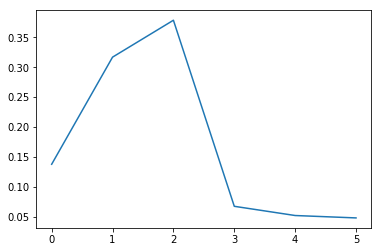

In [56]:
plt.plot(ad)

In [62]:
impdf=pd.DataFrame(ad,index=x.columns)
impdf

,0
Pclass,0.137622
Sex,0.316848
Age,0.378611
SibSp,0.067262
Parch,0.051835
Embarked,0.047822


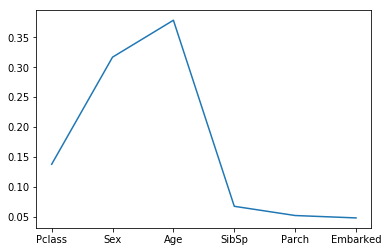

In [61]:
plt.plot(impdf)

In [63]:
result=impdf.reset_index()

In [64]:
print(result)

      index         0
0    Pclass  0.137622
1       Sex  0.316848
2       Age  0.378611
3     SibSp  0.067262
4     Parch  0.051835
5  Embarked  0.047822


In [58]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

No handles with labels found to put in legend.


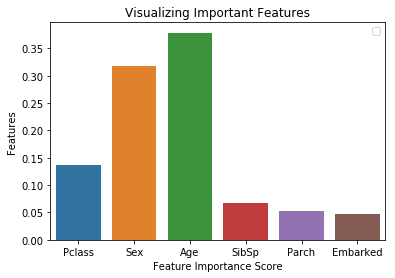

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=x.columns,y=clf.feature_importances_)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()